In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import data_preprocessing.data_loading as dl
import data_preprocessing.data_preprocess as dp
from ml_approach import fit_multinomial_mle

In [2]:
politicians = {"chrupalla": "AfD", "soeder": "CDU/CSU", "scholz": "SPD", "laschet": "CDU/CSU", "baerbock": "90/Greens", "weidel": "AfD", "lindner": "FDP", "wissler": "LINKE", "bartsch": "LINKE"}
valence = dl.get_valence_from_gesis(politicians)

# aggregate for parties where there are multiple spitzenkandidaten
valence = valence.groupby("party", as_index=False).agg({"politician": ' '.join, "valence": "mean"})
valence

,party,politician,valence
0,90/Greens,baerbock,4.660272
1,AfD,weidel chrupalla,2.691033
2,CDU/CSU,laschet soeder,4.467879
3,FDP,lindner,5.323999
4,LINKE,bartsch wissler,3.237964
5,SPD,scholz,6.222786


In [3]:
x_var='Democracy'
y_var='Control of Economy: Negative'
party_scaled, voter_scaled = dp.get_scaled_party_voter_data(x_var=x_var, y_var=y_var)

/Users/hilmar/Desktop/projects/studium/Case_Study_TUM25/data_preprocessing/data_loading.py:40: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/Users/hilmar/Desktop/projects/studium/Case_Study_TUM25/data_preprocessing/data_loading.py:57: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_filtered = df_filtered.apply(pd.to_numeric, errors="ignore")


In [4]:
voter_scaled

,Democracy,Control of Economy: Negative,who did you vote for:second vote(a),Party_Name,party_choice,Democracy Scaled,Control of Economy: Negative Scaled,Label
0,3.00,3.333333,6.0,90/Greens,0,0.578947,0.588235,Voter
1,3.25,5.000000,4.0,SPD,1,0.631579,0.882353,Voter
2,1.75,3.666667,1.0,CDU/CSU,2,0.315789,0.647059,Voter
3,3.25,5.000000,6.0,90/Greens,0,0.631579,0.882353,Voter
4,3.25,3.333333,322.0,AfD,3,0.631579,0.588235,Voter
...,...,...,...,...,...,...,...,...
6869,3.50,4.333333,4.0,SPD,1,0.684211,0.764706,Voter
6870,2.00,2.000000,1.0,CDU/CSU,2,0.368421,0.352941,Voter
6871,2.00,3.666667,4.0,SPD,1,0.368421,0.647059,Voter
6872,3.00,2.333333,4.0,SPD,1,0.578947,0.411765,Voter


In [5]:
party_scaled

,Country,Date,Calendar_Week,Party_Name,Democracy,Control of Economy: Negative,Democracy Scaled,Control of Economy: Negative Scaled,Democracy Mean,Control of Economy: Negative Mean,Democracy Mean Scaled,Control of Economy: Negative Mean Scaled,Label,Democracy_voter_lin,Control of Economy: Negative_voter_lin,Democracy_voter_lin Scaled,Control of Economy: Negative_voter_lin Scaled
0,Germany,26/09/2021,202109,90/Greens,5.544,0.0,1.000000,0.0,2.598638,3.684241,0.000000,0.621856,90/Greens,2.869547,3.397761,0.000000,0.0
1,Germany,26/09/2021,202109,LINKE,5.414,0.0,0.956449,0.0,3.030800,4.174933,0.404783,1.000000,LINKE,2.875029,3.397761,0.043551,0.0
2,Germany,26/09/2021,202109,SPD,3.864,0.0,0.437186,0.0,2.716914,3.606030,0.110783,0.561583,SPD,2.940384,3.397761,0.562814,0.0
3,Germany,26/09/2021,202109,FDP,4.785,0.0,0.745729,0.0,2.876074,2.877301,0.259859,0.000000,FDP,2.901550,3.397761,0.254271,0.0
4,Germany,26/09/2021,202109,CDU/CSU,2.559,0.0,0.000000,0.0,2.646504,2.993716,0.044834,0.089713,CDU/CSU,2.995409,3.397761,1.000000,0.0
5,Germany,26/09/2021,202109,AfD,3.558,0.0,0.334673,0.0,3.666276,3.050344,1.000000,0.133353,AfD,2.953286,3.397761,0.665327,0.0


In [6]:
def plot(voter_scaled, party_scaled):
    count = voter_scaled[[x_var, y_var]].value_counts()
    z_voter = count.values
    x_voter = count.index.get_level_values(0).values
    y_voter = count.index.get_level_values(1).values

    x_party = party_scaled[x_var + " Mean"]
    y_party = party_scaled[y_var + " Mean"]
    
    
    plt.Figure()

    plt.scatter(x_voter, y_voter, z_voter)
    plt.scatter(x_party, y_party)
    plt.xlabel(x_var)
    plt.ylabel(y_var)

    if "Label" in party_scaled:
        label = party_scaled["Label"]
        for x, y, text in zip(x_party, y_party, label):
            plt.text(x, y, text)

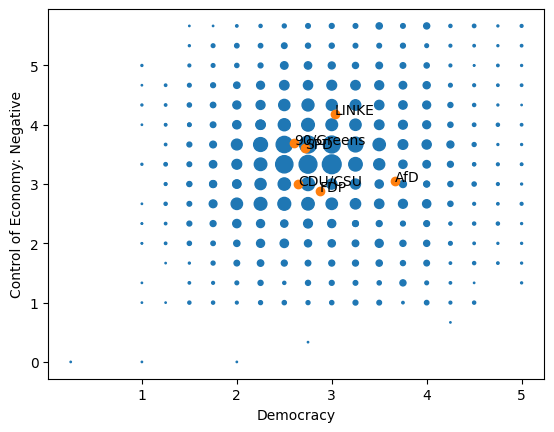

In [7]:
plot(voter_scaled, party_scaled)

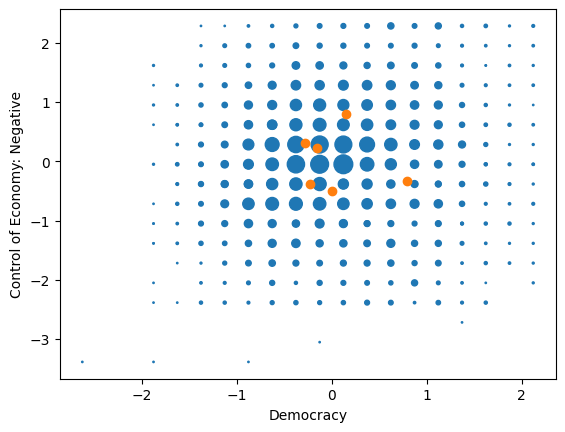

In [ ]:
voter = voter_scaled[[x_var, y_var]].copy()
party = party_scaled[[x_var + " Mean", y_var + " Mean"]].copy()

# shift by mean
mean = voter.mean()
voter[x_var] -= mean[x_var]
voter[y_var] -= mean[y_var]
party [x_var + " Mean"] -= mean[x_var]
party [y_var + " Mean"] -= mean[y_var]

plot(voter, party)

In [9]:
# covariance matrix calculation
xi_1 = voter[x_var].values
xi_2 = voter[y_var].values

covariance_matrix = np.zeros((2,2))
covariance_matrix[0,0] = np.dot(xi_1, xi_1)
covariance_matrix[1,1] = np.dot(xi_2, xi_2)
covariance_matrix[0,1] =  covariance_matrix[1,0] = np.dot(xi_1, xi_2)
covariance_matrix *= 1 / len(xi_1)
covariance_matrix

array([[0.51480946, 0.0466534 ],
       [0.0466534 , 0.90722761]])

In [10]:
# v^2 calculation
v_sqr = np.trace(covariance_matrix)
v_sqr

np.float64(1.4220370685211816)

In [11]:
# \rho_1 calculation
min = valence["valence"].idxmin()
val = valence["valence"] - valence.loc[min, "valence"]
val = val[val.index.difference([min])]
val = np.exp(val)
rho_1 = 1 / (1 + val.sum())
rho_1

np.float64(0.0156486754951062)

In [12]:
# beta calculation
beta = 1
beta

1

In [13]:
# A_1 calculation
A_1 = beta * (1-2*rho_1)
A_1

np.float64(0.9687026490097876)

In [14]:
# characteristic matrix C_1
C_1 = 2 * A_1 * covariance_matrix - np.eye(covariance_matrix.shape[0])
C_1

array([[-0.00260543,  0.09038655],
       [ 0.09038655,  0.75766758]])

In [15]:
np.linalg.eig(C_1)

EigResult(eigenvalues=array([-0.01320348,  0.76826563]), eigenvectors=array([[-0.993196 , -0.1164547],
       [ 0.1164547, -0.993196 ]]))

Text(0, 0, 'hallo')

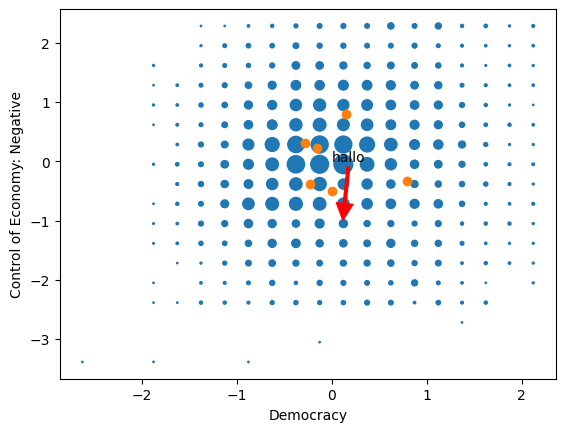

In [16]:
# plot positive eigenvector
plot(voter, party)
plt.annotate("hallo", (0.1164547, -0.993196), (0,0), arrowprops=dict(width=2, color="red"))

In [17]:
# convergence coefficient calculation
convergence_coefficient = 2*A_1*v_sqr
convergence_coefficient

np.float64(2.755062150533163)